#  1. Home owning and interest rate effect in paying Loans 

In [1]:
import pandas as pd
import numpy as np 
import scipy.io
import matplotlib.pyplot as plt 
import seaborn as sb
import statsmodels.api as sm
from matplotlib import rcParams

# 2. Data importing 

In [2]:
# load the data with encoding latin-1 as it has some data cannot be encoded
df=pd.read_csv('prosperLoanData.csv')
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


# 2. Exploration phase 
## The questions I will try to answer are :-

* Is being economically stable affects the Loan status waeather it will be completed or to be charged off ? for that I will consider owning a home 
* Furthermore , I will try to investigate the effect of the original loan amount in Two things "the interst rate and the status of the loan "
* Then, I will try to answer does the borrower interest rate affects the status of the loan ?

## 3.1 what are the percentage of borrowers who Repay Loans  ?

In [3]:
# here I will start by checking the statues for every loan 
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

**This step is part of the data wrangling process to make it ready for analysis** 
* I will assume all the past due regardless of the duration is just past due 
* due to they are not yet charged off so I will assume the past due data as current loan which can be paid or not 

In [4]:
# for me to be easier to perfrom analysis I will change all the past due statues to just Past Due 
# I will create a function for this purpose 
def replace_key_words(df,the_new_keyword,the_name_of_the_column,*argv):
    '''
    this is a function that can be used to replace one or more key words in a specific column in a 
    pandas data frame with new key_word 
    variable :
    df : the pandas dataframe 
    the_new_keyword : the new key word to change all the key words to
    the_name_of_the_column: the name of the column that contains the key word 
    * argv : all the keywords that we want to replace 
    return :
    df with the new information 
    '''
    for key_word in argv:
        df[the_name_of_the_column].replace(key_word,the_new_keyword,inplace=True)
    return(df)
replace_key_words(df,'Past Due','LoanStatus','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (61-90 days)', 'Past Due (31-60 days)','Past Due (>120 days)','Past Due (91-120 days)')
df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'FinalPaymentInProgress'], dtype=object)

In [5]:
# check for duplicate in the listing key 
df.duplicated('ListingKey').sum()

871

In [6]:
# now we need to see this duplicated columns to see what can we do with it 
df_duplicated=df[df.duplicated('ListingKey',keep=False)].sort_values(by='ListingNumber')
df_duplicated.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
33649,C9FF35684194774626F5F95,701942,2013-01-20 21:07:13.620000000,NaN,36,Current,NaN,0.06726,0.0605,0.0505,...,-59.65,0.0,0.0,0.0,0.0,1.0,0,0,0.0,249
32664,C9FF35684194774626F5F95,701942,2013-01-20 21:07:13.620000000,NaN,36,Current,NaN,0.06726,0.0605,0.0505,...,-59.65,0.0,0.0,0.0,0.0,1.0,0,0,0.0,249
16311,45C2357870288848093FB87,786407,2013-05-22 19:42:23.417000000,NaN,60,Current,NaN,0.24036,0.2155,0.2055,...,-61.67,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
87265,45C2357870288848093FB87,786407,2013-05-22 19:42:23.417000000,NaN,60,Current,NaN,0.24036,0.2155,0.2055,...,-61.67,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
52546,0A933581807397002C26759,812537,2013-06-18 05:51:48.647000000,NaN,60,Current,NaN,0.16294,0.1399,0.1299,...,-52.97,0.0,0.0,0.0,0.0,1.0,0,0,0.0,155


As you can see from the duplicated rows it has every thing is the same "the key,the number and most importantly the Creation Date so this is most likely to be an entry mistake so now we can just drop duplicated values .

In [7]:
# now lets drop the duplicated values 
df=df.drop_duplicates('ListingKey')
# make sure no duplicate Now 
df.duplicated('ListingKey').sum()

0

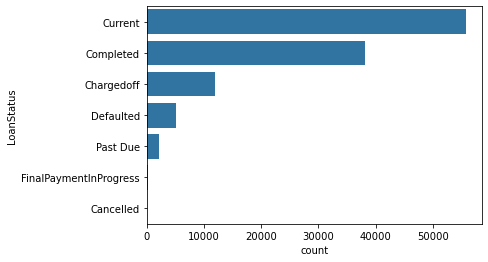

In [8]:
# Now lets explore the loan statues graphically using bar plots
Loan_status_count=df['LoanStatus'].value_counts()
value_order=Loan_status_count.index
# getting the base color from the available colors 
base_color=sb.color_palette()[0]
# bar plot 
sb.countplot(data=df, y='LoanStatus',color=base_color,order=value_order);

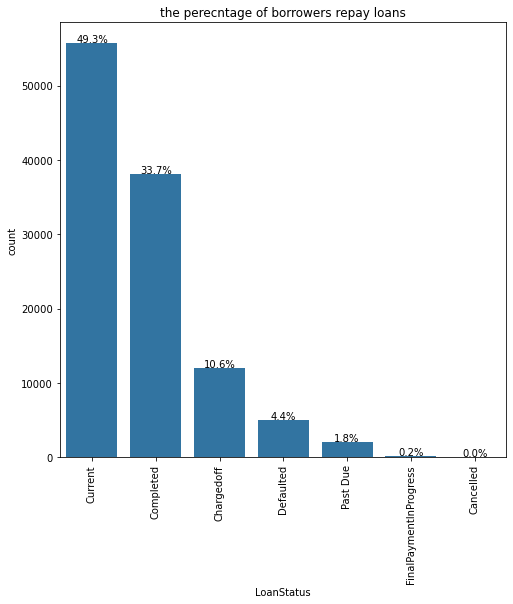

In [9]:
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 8,8
# to give a better understanding we will need the percentage for every statues 
sb.countplot(data=df, x='LoanStatus',color=base_color,order=value_order);
plt.xticks(rotation=90)
plt.title('the perecntage of borrowers repay loans')
# number of all loans is the nsum of all the values in the loan statues column
n_loan=Loan_status_count.sum()
for index,label in enumerate(value_order):
    count = Loan_status_count[label]
    pct_string = '{:0.1f}%'.format(100*count/n_loan)
    plt.text(index, count+100, pct_string, ha ='center', color = 'black')

## 3.2  Is owning a home leads to more assurance in repaying ?  

In [10]:
# so first lets check the unique values in [IsBorrowerHomeowner] column
df.IsBorrowerHomeowner.unique()

array([ True, False])

In [11]:
# then lets check if there are any missing values or nan 
df.IsBorrowerHomeowner.isnull().sum()
home_owners_counts=df['IsBorrowerHomeowner'].value_counts()
home_owners_counts

True     57052
False    56014
Name: IsBorrowerHomeowner, dtype: int64

* In the remaining analysis we are just intersted in Two status 'completed' or 'chargedoff' so I will perfrom some more data wrangling and remove the other status .
* The IsBorrowerHomeOwner has a boolean data True/False it will be better to rearrange it and make it two categorial something like "homeowner" and "not a homeowner" for better labels and legends in in visualization (better to store this modification in a new dataframe lets say df2)

In [12]:
# using the function in cell 19 to rename the labels 
df2=replace_key_words(df,"homeowner",'IsBorrowerHomeowner',True)
df2=replace_key_words(df2,"not a homeowner",'IsBorrowerHomeowner',False)
# keeping only Two statues in the data 
condition_1=df2['LoanStatus']=='Completed'
condition_2=df2['LoanStatus']=='Chargedoff'
df2=df2.where(condition_1|condition_2)
df2 = df2[df2['LoanStatus'].notna()]

Now we will have to do some Bivariate exploration to investigate the  effect of some variables in the loan status 
* first we will need to know the perecntage of borrowers who completed/chargedoff from the home owners or the non home owners 

Here is the plot to show the number of borrowers who completed or considered as chargedoff from home owners or non home owners.

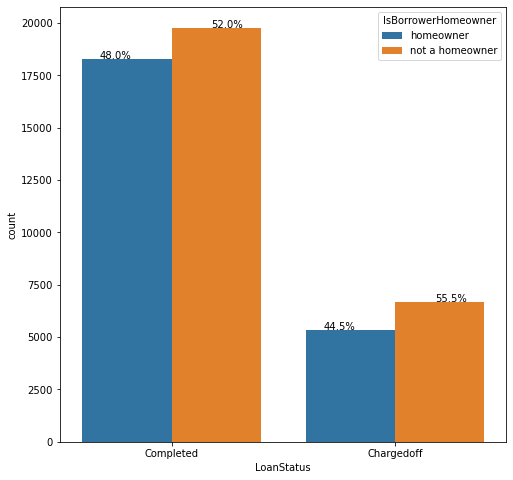

In [13]:
# calcultaing the home owner vs non home owner for each category
plt.figure(figsize = [8, 8])
sb.countplot(data = df2, x = 'LoanStatus', hue = 'IsBorrowerHomeowner')
def plot_percentage_for_multi_bar_plots(df,y_axis_column_name,x_axis_column_name):
    """
    Variables :

    df : the data frame 
    y_axis_column_name: the name of the y axis column 
    x_axis_column_name : the name of the x axis column
    
    Return :
    None 
    """
    x_axis_labels=df[x_axis_column_name].unique()
    y_axis_labels=df[x_axis_column_name].unique()
    n_data=len(x_axis_labels)*len(y_axis_labels)
    # the zero indexing is the in the middle of the first multi bar plots so we have to positioning from 0 
    #(this is position not index )
    index=-1/n_data
    for label in x_axis_labels:
        value_counts=df2[y_axis_column_name].where(df[x_axis_column_name]==label).value_counts()
        value_order=value_counts.index.sort_values()
        n_values=value_counts.sum()
        for label in value_order:
            count = value_counts[label];
            pct_string = '{:0.1f}%'.format(100*count/n_values);
            plt.text(index,count+10,pct_string, ha ='center', color = 'black');
            index +=1/len(y_axis_labels)
plot=plot_percentage_for_multi_bar_plots(df2,'IsBorrowerHomeowner','LoanStatus')

As we can see from this plot 48 % from the people who completed the loan is home owner while 52% where not home owner and this trend is the same also in the people who are charged off . yet we cannot see significance evidence in the effect of being home owner or not in the status of the loan. 
**to be able to draw more conclusions a regression model might be done to show if there is an effect from being a home owner as it is can be considered as an A/B test case**
 so we will need to add a dummy variable 


In [14]:
## the regression model 
def add_dummy_variable(df,column_name):
    #get the unique value from the column
    dummy_variables=list(df[column_name].unique())
    # sort the variables
    dummy_variables.sort()
    # build a df has a  dummy variable 
    df[dummy_variables]=pd.get_dummies(df[column_name])
    return(df)
# as our variables here are categorial we need to create a dummy variable for the two variables in interest 
df2=add_dummy_variable(df2,'LoanStatus')
df2=add_dummy_variable(df2,'IsBorrowerHomeowner')

## using logistic regression because we have categorial variables 

def build_alinear_model_using_sm_Logit(df,y_predicted_values,*argv):
    """
    y_predicted_value : the predicted value 
    *argv: all the X variables NOT INCLUDING intercept the function add it automatically 
    return : result of the model 
    """
    df['intercept']=1
    model=sm.Logit(df[y_predicted_values],df[['intercept',*argv]])
    result=model.fit()
    return(result)
result=(build_alinear_model_using_sm_Logit(df2,'Completed',"homeowner"))
result.summary2()

Optimization terminated successfully.
         Current function value: 0.208161
         Iterations 5


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3409: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: inf       
Dependent Variable: Completed        AIC:              20842.1232
Date:               2021-05-04 22:19 BIC:              20859.7649
No. Observations:   50053            Log-Likelihood:   -10419.   
Df Model:           1                LL-Null:          0.0000    
Df Residuals:       50051            LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    1.0887     0.0142   76.8548   0.0000   1.0609   1.1165
homeowner    0.1433     0.0210    6.8082   0.0000   0.1020   0.1845
=================================================================

"""

As we indicated from our bar plot . The regression model shows that the p value is 0 and that means being home owner has an effect in weather or not the status of your loan will be completed . the surprise here which still in the same page as what the bar plot showed earlier is that it leads to decrease in the number of the borrowers with the completed status .

## 3.3 Does the Loan amount  affects the repaying of the loan ?

* here we will try to investigate the loan amount as a histogram to see the distribution of the data . 
* Then we will see suing a scatter plot the effect of the loan amount in the interest rate . 
* Finaly, we will study how this loan amount affects the loan status using box plot 


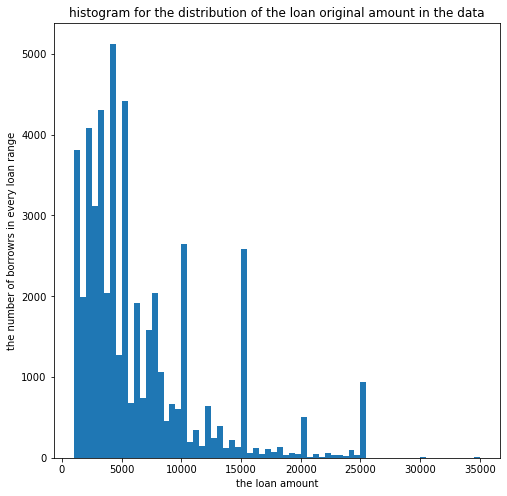

In [15]:
# histogram for the 'LoanOriginalAmount'
plt.figure(figsize = [8, 8])
bins=np.arange(df2['LoanOriginalAmount'].min(),df2['LoanOriginalAmount'].max()+500,500)
plt.hist(data=df2,x='LoanOriginalAmount',bins=bins);
plt.xlabel('the loan amount');
plt.ylabel('the number of borrowrs in every loan range');
plt.title('histogram for the distribution of the loan original amount in the data');

* As we can see from this histogram this data is left skewed and that means the largest portion of the borrowers has borrowed small amount of cash .
* Then we will need to see the mean ,max and minimum of the original loan amount in relation to the two loan status for that I will use violit plot and box plot  

In [16]:
def box_plot_violit_plot(df,x,y):
    plt.figure(figsize = [16, 8])
    base_color=sb.color_palette()[0]
    plt.subplot(1, 2, 1)
    sb.violinplot(data=df,x=x, y=y,color=base_color)
    plt.title('violit plot for the distribution of '+y+' with Loan status');
    # RIGHT plot: box plot
    plt.subplot(1, 2, 2)
    sb.boxplot(data=df,x=x, y=y,color=base_color)
    plt.title('box plot for the distribution of '+y+' with Loan status');

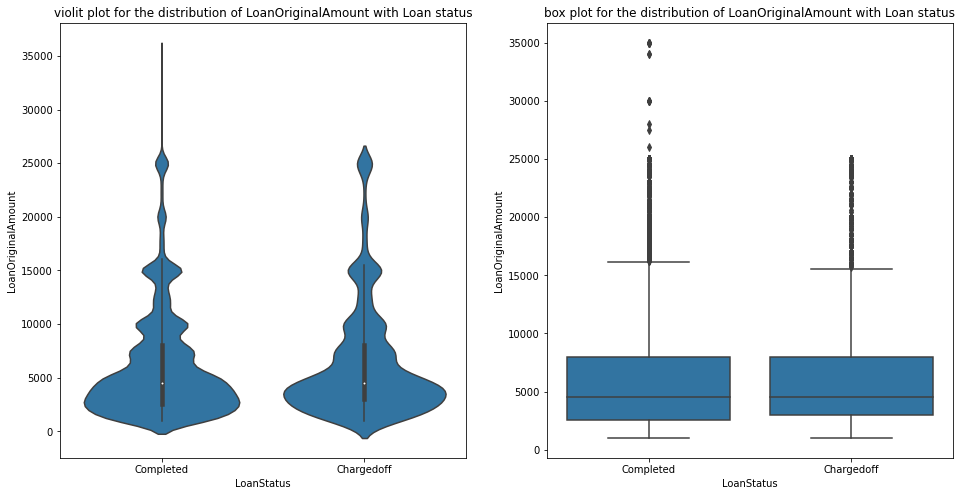

In [17]:
box_plot_violit_plot(df2,'LoanStatus','LoanOriginalAmount')

Looking at this two box plots we can see they are almost identical even the violin plot have the same shape which shows that the Loan amount has no effect yet in weather or not the Loan status become completed or charged off and that will lead us to start investigate a third relationship a scatter plot between the loan amount and the interest rate to see if it has effect in the interest rate. 

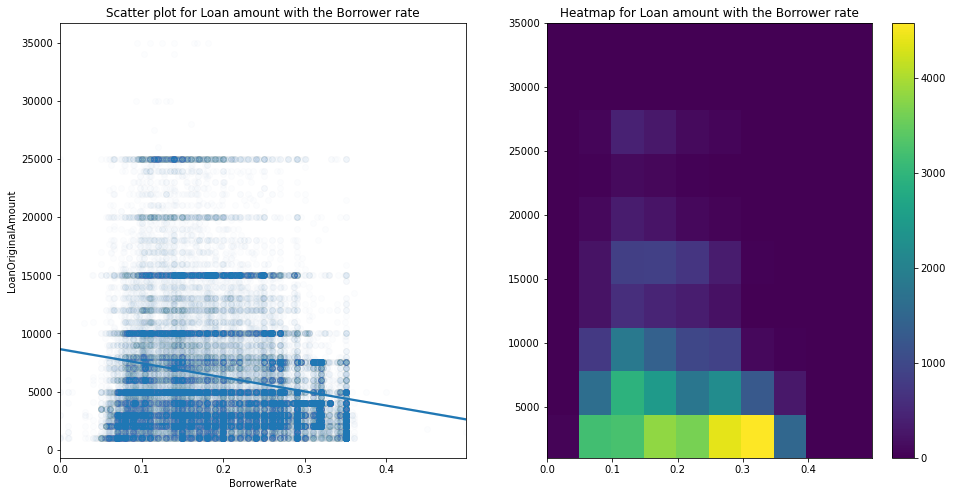

In [18]:
# scatter plot 
plt.figure(figsize = [16, 8])
plt.subplot(1, 2, 1)
sb.regplot(data = df2,  x = 'BorrowerRate', y= 'LoanOriginalAmount',scatter_kws={'alpha':1/100});
plt.title('Scatter plot for Loan amount with the Borrower rate')
# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = df2,   x = 'BorrowerRate', y= 'LoanOriginalAmount')
plt.colorbar()
plt.title('Heatmap for Loan amount with the Borrower rate');

 looking at this scatter plot we cannot say the Loan amount has any thing to do with the interest rate . and looking at the heat map we can draw the same conclusion that original loan amounts which not exceeding the 10000 are the major part of the data and the interest rate doesnt change with the loan amount . so we can say from this data the loan amount doesnt affect the end status of the loan . 
 
 * the next thing is to investigate the interest rate by it`s own to see if it has an effect in the outcome of the loan status

## 3.4 The  effect of the interest rate in repaying the dept 

**Now we need to investigate another variable and due to this variable is numerical we will need to use another kind of plots to investigate it as univariate and as bivariate exploration . This variable is the interest rate associated with the borrower** 
* we will use histogram to show the distribution of the interest rate in our data 
* we will have box plots to investigate it`s relation with the status of the loan 

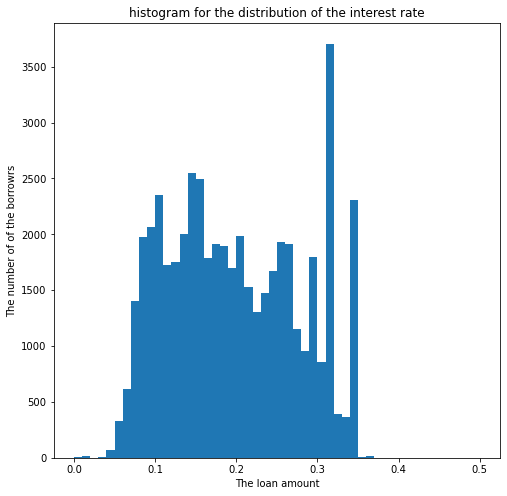

In [19]:
# histogram for the 'BorrowRate'
plt.figure(figsize = [8, 8])
bins=np.arange(df2['BorrowerRate'].min(),df2['BorrowerRate'].max()+.01,.01)
plt.hist(data=df2,x='BorrowerRate',bins=bins);
plt.xlabel('The loan amount');
plt.ylabel('The number of of the borrowrs');
plt.title('histogram for the distribution of the interest rate');

Actually we cannot draw so  many conclusions from this univariate exploration of the data .the data almost distributed equally between the very low interst and the very high interest despite the facts that we have two big bins at 35 % rate  .but we can reach a conclusion the lowest interest rate is in 5% and the highest interest rate is in range 35% which . but the borrowers distribution looks normal if we excluded this two noise bins at 33% and 35 % approximatly.

**The better way to investigate this variable is using bi variant exploration to see how the percentage rate affected the loan status** . We can do so using the box plot as it will give us insight regarding the mean of every category ,the maximum and minimum values .

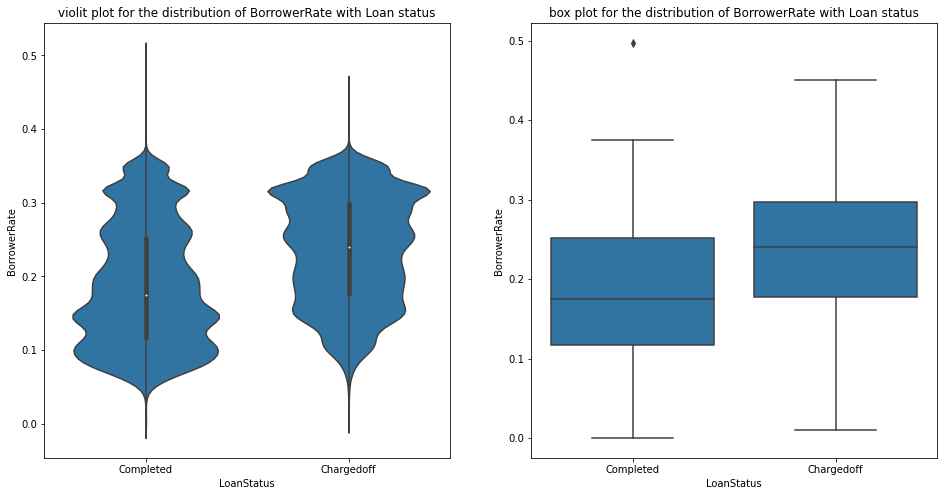

In [20]:
# first we need to check if there are any null values in the IncomeRange
box_plot_violit_plot(df2,'LoanStatus','BorrowerRate')

Lets look at this box plot to see what did we get here:
* the mean of the interest rate of the borrowers who finished /completed the loan is lower than the avearage of the customer who was marked as chargedoff significantly.
* the variation in the data in the charged off borrowrs looks bigger than the one in the completed status borrowrs . yet , we cannot draw more conclusions from this box plot so we will need the violit plots to show us more regarding the distribution of the data .
* when looking at the violin plot we can see that the distribution of the borrowers covers the same interest in both categories . also we can say that from the violin plot ,in the completed loan status more borrowers is in the lower rate interest while the opposite can be said regarding the chargedoff customer . it looks like the violin in the right is upside down of the violin in the left . which shows how siginificant the Rate affaect the status of the Loan 

**now what will we get from investigating the loan status with the loan original amount and the interest rate** 
* The type of plot which will show our data in a good way will be the heat map to show where most of our points lie for nevery group 

In [ ]:
g = sb.FacetGrid(data = df2, col = 'LoanStatus', size = 6)
#plt.hist2d(data = df2,   x = 'BorrowerRate', y= 'LoanOriginalAmount')
#plt.colorbar()
g.map(plt.hist2d,'BorrowerRate', 'LoanOriginalAmount');
plt.colorbar();

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


* Investigating this Two plots is really intersting as we can see in the right plot which show the category of the borrowrs who completed the loan ,the highest portion of people lie in the low interest almost 10% interest with Loan amount is very less almost 5000 so the total payment back doesnt differ so much from the original amount which was received from the borrower.

* investigating the borrowers who was not able to repay the loan showed that the highest portion was in the category with very high interest 30 to 35 % almost and while the Loan original amount considered yet not big but this interest rate has significant effect in the ability of the borrower to pay back the loan .